In [1]:
import cv2 as cv
import numpy as np

from matplotlib import pyplot as plt
import pylab # this allows you to control figure size

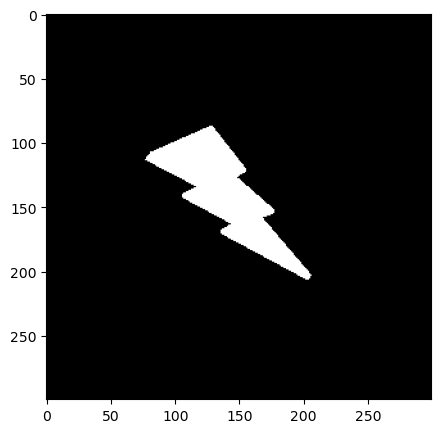

In [2]:
pylab.rcParams['figure.figsize'] = (8, 5.0) # this controls figure size in the noteboo

imgc = cv.imread("archives/rayo.png")
img = cv.cvtColor(imgc, cv.COLOR_BGR2GRAY)
ret,th = cv.threshold(img,127,255,0)
plt.imshow(th, cmap="gray")

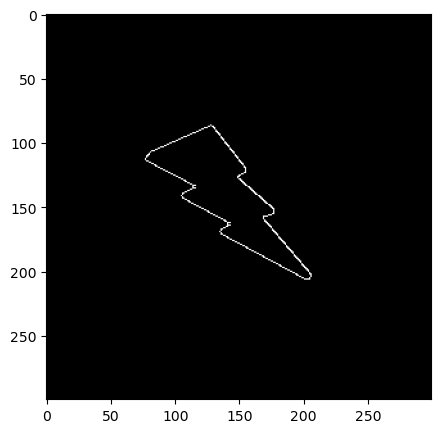

In [3]:
umbral_minimo = 50
umbral_maximo = 100
cn = cv.Canny(th, umbral_minimo, umbral_maximo)
plt.imshow(cn, cmap="gray")

1
Centro: 139, 139
Área: 4933.5  Perímetro: 435.91377425193787


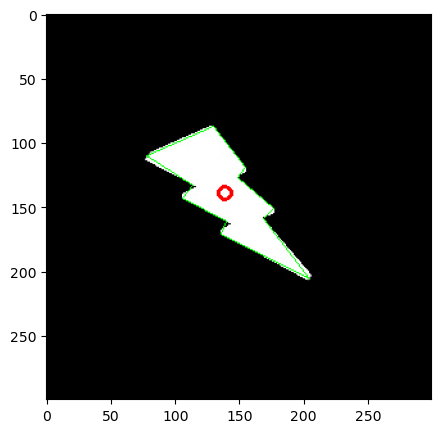

In [4]:
contornos, jerarquia = cv.findContours(cn.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print(len(contornos))
cnt = contornos[0]
M = cv.moments(cnt)
if M['m00'] != 0:
  cx = int(M["m10"]/M['m00'])
  cy = int(M["m01"]/M['m00'])
  print(f"Centro: {cx}, {cy}")
  cv.circle(imgc, (cx, cy), 5, (255, 0, 0), 2)
area = cv.contourArea(cnt)
perimetro = cv.arcLength(cnt, True)
print(f"Área: {area}  Perímetro: {perimetro}")

approx = cv.approxPolyDP(cnt, 0.01*perimetro, True )
cv.drawContours(imgc, [approx], -1, (0,255,0), 1)
plt.imshow(imgc)

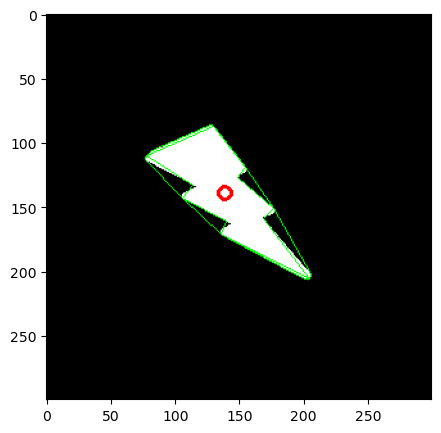

In [5]:
hull = cv.convexHull(cnt)
img2 = imgc.copy()
cv.drawContours(img2, [hull], -1, (0,255,0), 1)
plt.imshow(img2)

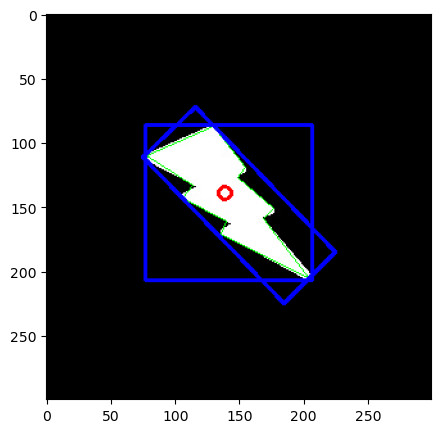

In [6]:
x,y,w,h = cv.boundingRect(cnt)
img2 = imgc.copy()
cv.rectangle(img2, (x,y), (x+w, y+h), (0,0,255), 2)

rect = cv.minAreaRect(cnt)
box = cv.boxPoints(rect)
box = np.intp(box)
cv.drawContours(img2,[box],0,(0,0,255),2)
plt.imshow(img2)

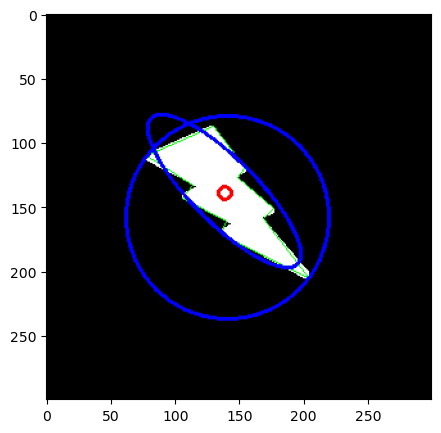

In [7]:
(x,y),radius = cv.minEnclosingCircle(cnt)
img2 = imgc.copy()
cv.circle(img2, (int(x), int(y)), int(radius), (0,0,255), 2)
elipse = cv.fitEllipse(cnt)
cv.ellipse(img2, elipse,  (0,0,255), 2)
plt.imshow(img2)